In [2]:
import pandas as pd
import numpy as np

In [3]:
feature_eng_data = pd.read_csv(r"C:\Users\karis\Financial-Risk-Pipeline-for-P2P-Lending-Investments\featured_data.csv")

In [4]:
print(feature_eng_data.head())
print(feature_eng_data.describe())

                listingkey  listingnumber            listingcreationdate  \
0  1021339766868145413AB3B       193129.0  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1      1209647.0  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A        81716.0  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A       658116.0  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2       909464.0  2013-09-14 18:38:39.097000000   

   term  borrowerapr  borrowerrate  lenderyield  estimatedeffectiveyield  \
0    36      0.16516        0.1580       0.1380                  0.16150   
1    36      0.12016        0.0920       0.0820                  0.07960   
2    36      0.28269        0.2750       0.2400                  0.16150   
3    36      0.12528        0.0974       0.0874                  0.08490   
4    36      0.24614        0.2085       0.1985                  0.18316   

   estimatedloss  estimatedreturn  ...  employmentstatus_Part-time  \
0         0.0724

In [5]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load Data
df = pd.read_csv(r"C:\Users\karis\Financial-Risk-Pipeline-for-P2P-Lending-Investments\featured_data.csv")
target = 'loan_status_binary'


In [7]:
#data overview
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes.value_counts())
print("\nMissing Values:\n", df.isnull().sum().sort_values(ascending=False).head())
display(df.describe(include='all').T.head())

Shape: (113932, 88)

Data Types:
 float64    45
bool       23
object     10
int64      10
Name: count, dtype: int64

Missing Values:
 listingkey             0
listingnumber          0
listingcreationdate    0
term                   0
borrowerapr            0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
listingkey,113932,113061,17A93590655669644DB4C06,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listingnumber,113932.0,NaN,NaN,NaN,627882.409623,327672.576259,16340.17,401031.0,600572.5,892729.5,1221572.21
listingcreationdate,113932,113059,2013-10-02 17:20:16.550000000,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
term,113932.0,NaN,NaN,NaN,40.83046,10.436392,12.0,36.0,36.0,36.0,60.0
borrowerapr,113932.0,NaN,NaN,NaN,0.218813,0.079983,0.07419,0.15629,0.20976,0.2837,0.37453


In [8]:
'''
Insights:
The dataset is clean and complete — ready for modeling.
High number of numerical and boolean (one-hot encoded) columns.
No major missing data issues found.
'''

'\nInsights:\n\nThe dataset is clean and complete — ready for modeling.\n\nHigh number of numerical and boolean (one-hot encoded) columns.\n\nNo major missing data issues found.\n'

C:\Users\karis\AppData\Local\Temp\ipykernel_2308\3610856676.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=df, palette='pastel')


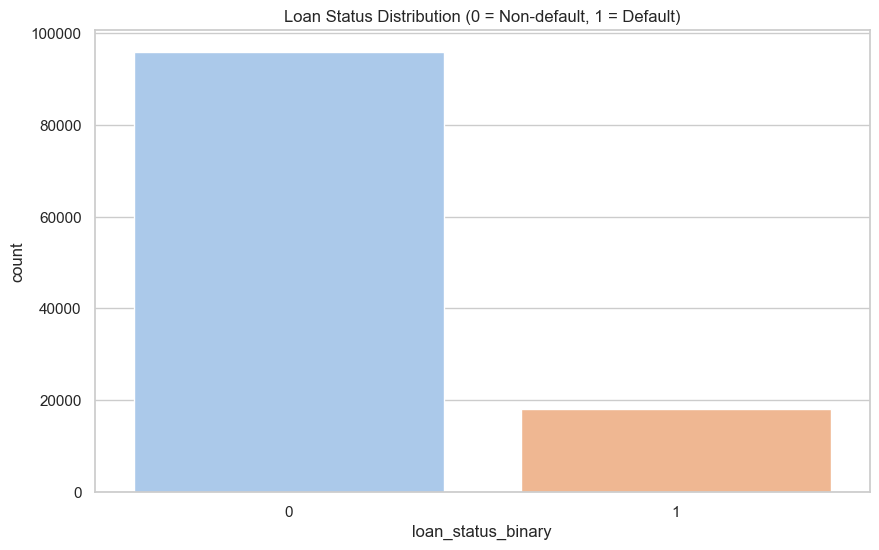

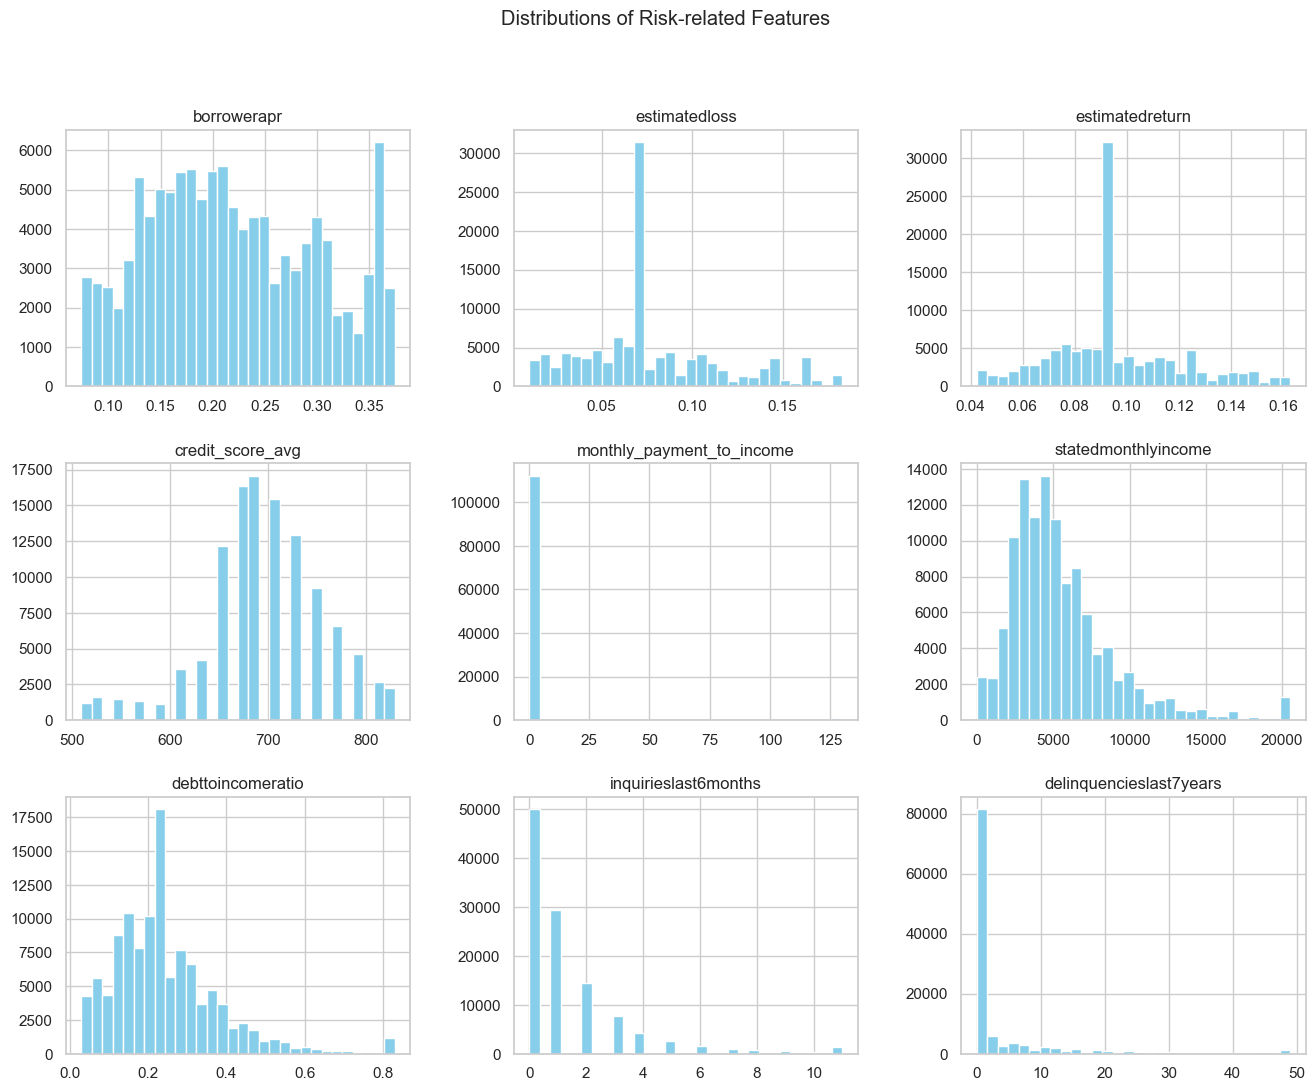

In [9]:
#Univariate Analysis
risk_features = [
    'borrowerapr', 'estimatedloss', 'estimatedreturn', 'credit_score_avg',
    'monthly_payment_to_income', 'statedmonthlyincome', 'debttoincomeratio',
    'inquirieslast6months', 'delinquencieslast7years'
]

# Target Distribution
sns.countplot(x=target, data=df, palette='pastel')
plt.title("Loan Status Distribution (0 = Non-default, 1 = Default)")
plt.show()

# Histograms
df[risk_features].hist(bins=30, figsize=(16, 12), color='skyblue')
plt.suptitle("Distributions of Risk-related Features")
plt.show()

In [ ]:
'''
a. Target Distribution (Countplot):
Class 0 (non-default): ~84%
Class 1 (default): ~16%

Insights:
Class imbalance detected – consider techniques like stratified sampling, SMOTE, or using metrics like AUC for evaluation.

b. Histograms of Risk Features:
borrowerapr, estimatedloss, monthly_payment_to_income, etc., are right-skewed.
credit_score_avg follows a normal-like distribution.

Insights:
Most financial risk metrics are skewed, indicating that extreme values (outliers) may heavily impact risk.
Could consider log transformations for skewed variables in modeling.

C:\Users\karis\AppData\Local\Temp\ipykernel_2308\1723701050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


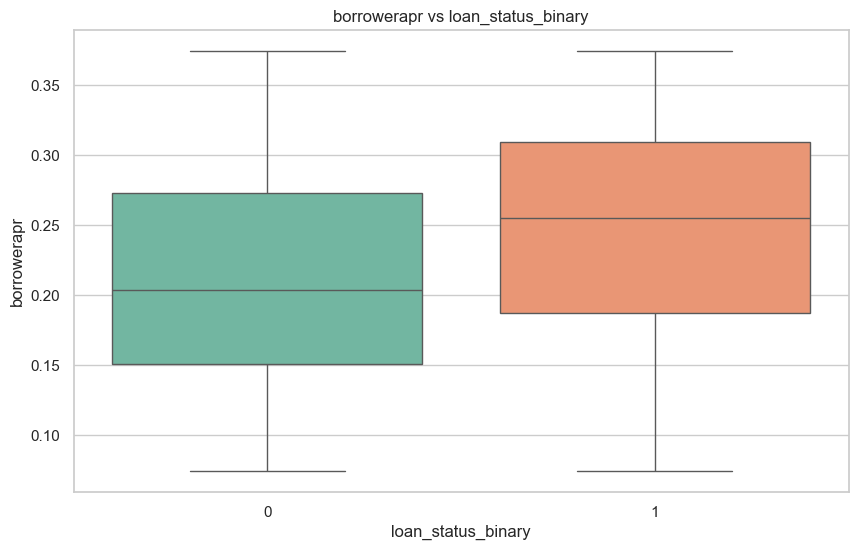

C:\Users\karis\AppData\Local\Temp\ipykernel_2308\1723701050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


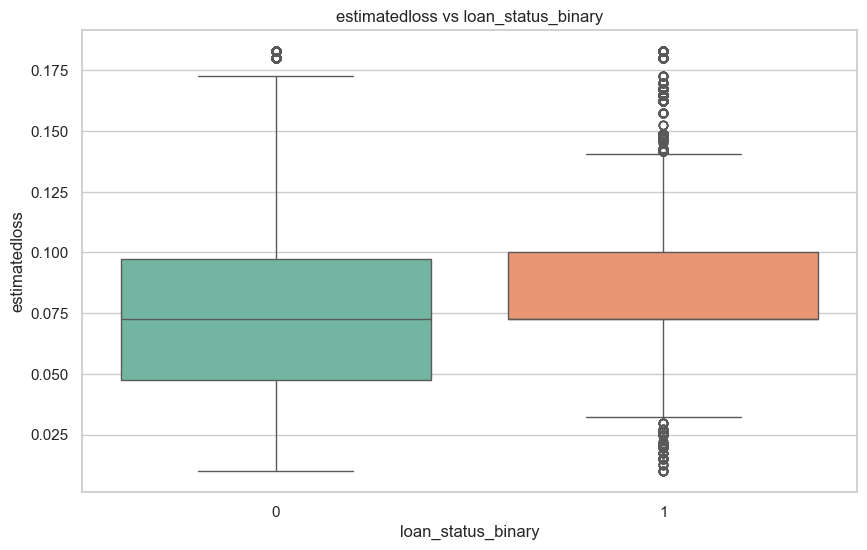

C:\Users\karis\AppData\Local\Temp\ipykernel_2308\1723701050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


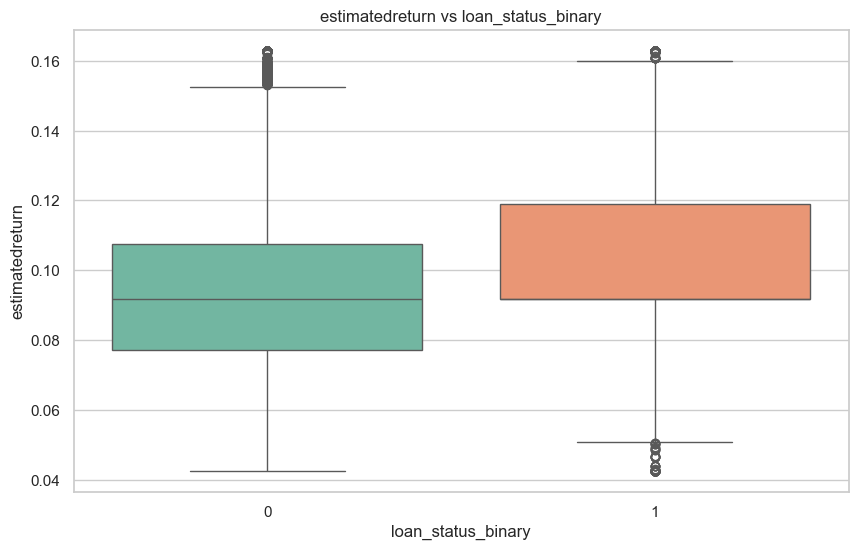

C:\Users\karis\AppData\Local\Temp\ipykernel_2308\1723701050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


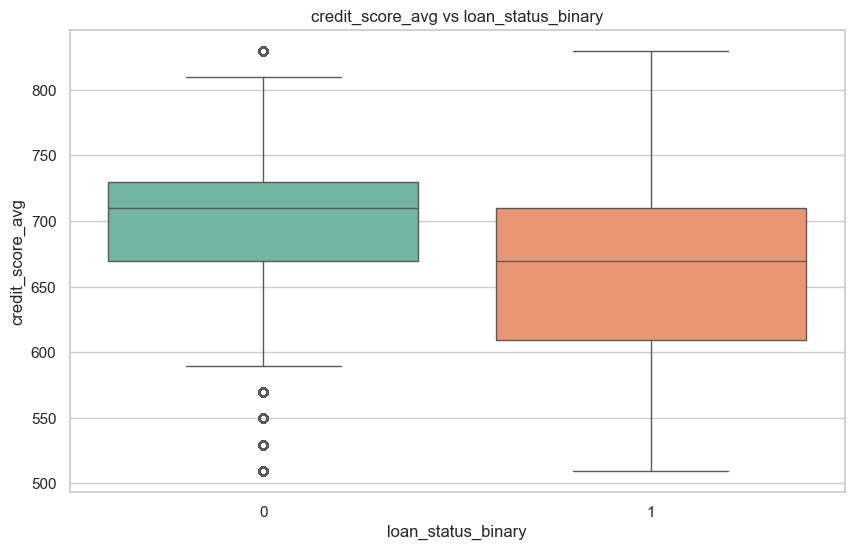

C:\Users\karis\AppData\Local\Temp\ipykernel_2308\1723701050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


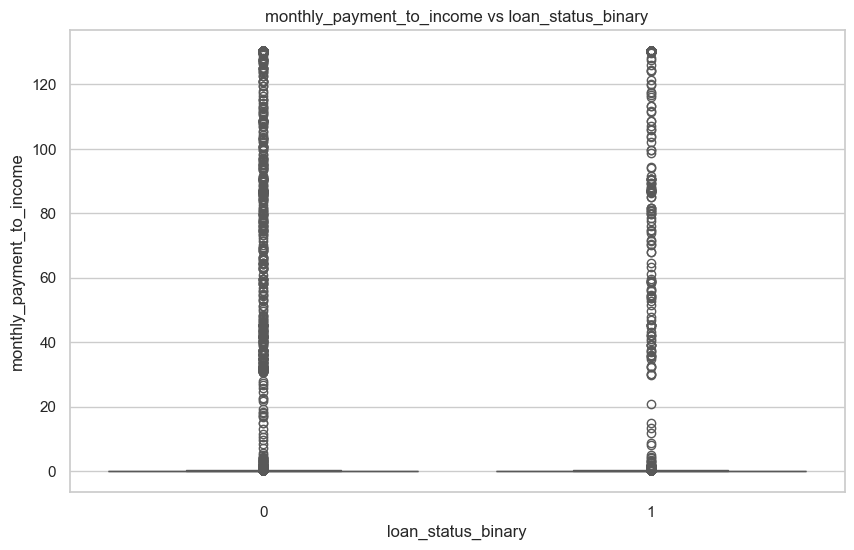

C:\Users\karis\AppData\Local\Temp\ipykernel_2308\1723701050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


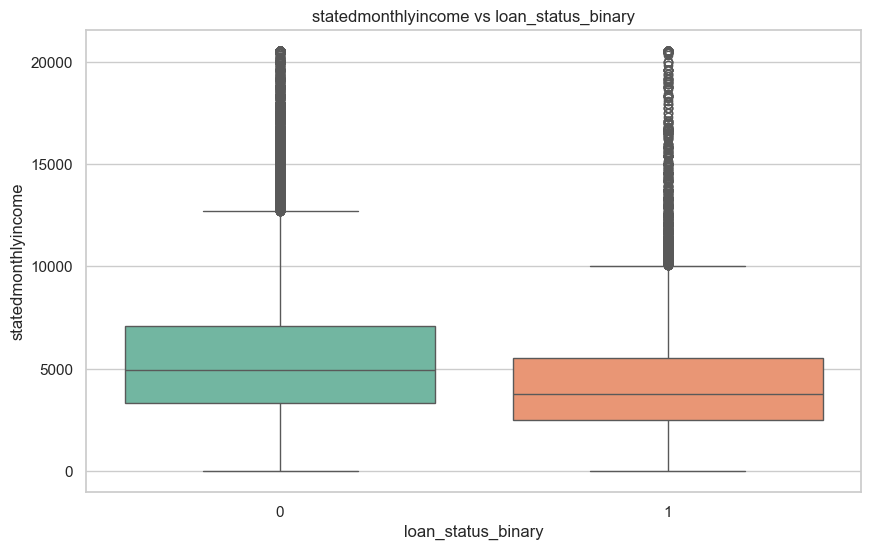

C:\Users\karis\AppData\Local\Temp\ipykernel_2308\1723701050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


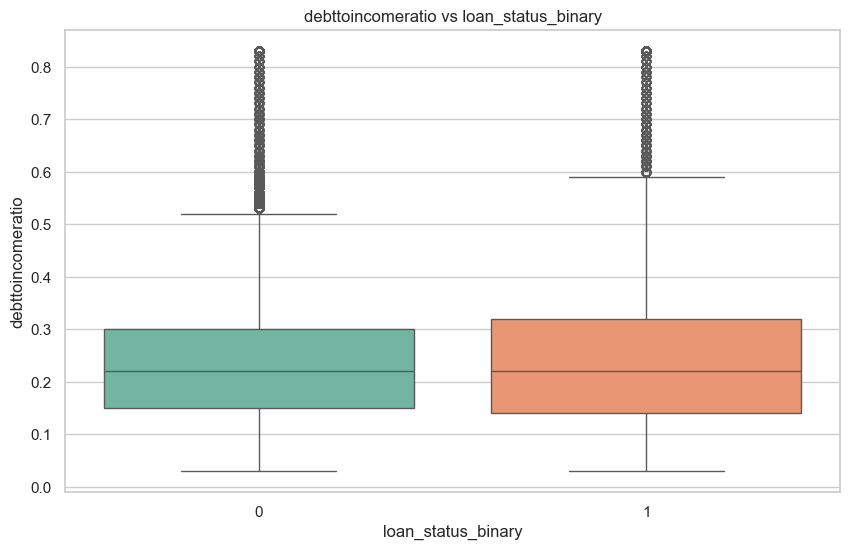

C:\Users\karis\AppData\Local\Temp\ipykernel_2308\1723701050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


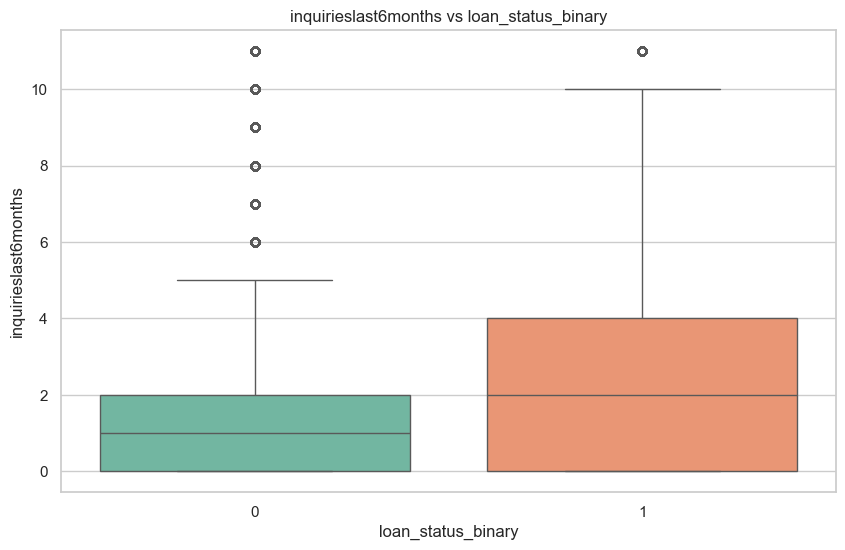

C:\Users\karis\AppData\Local\Temp\ipykernel_2308\1723701050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


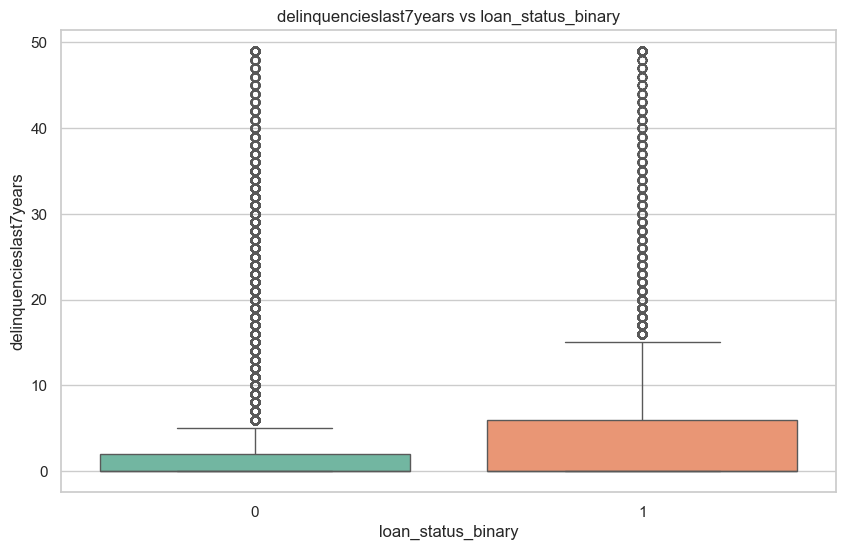

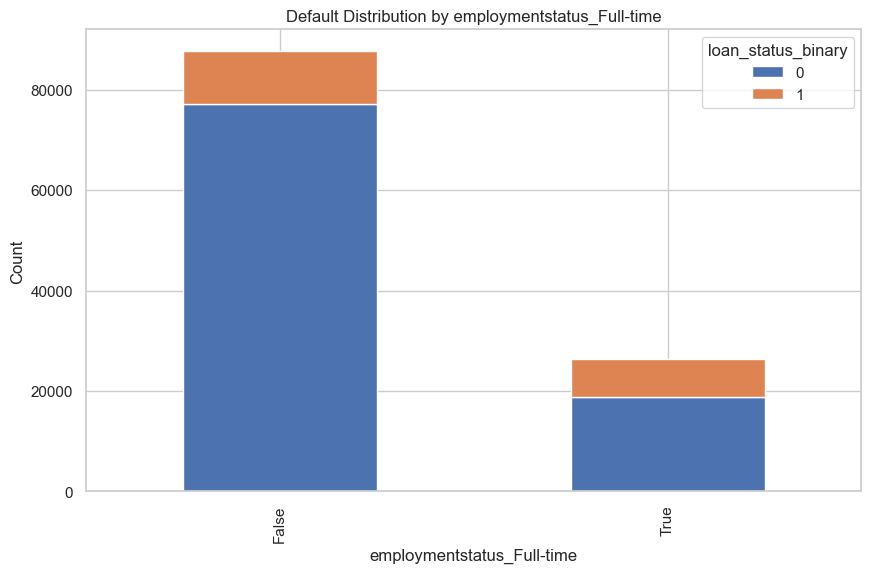

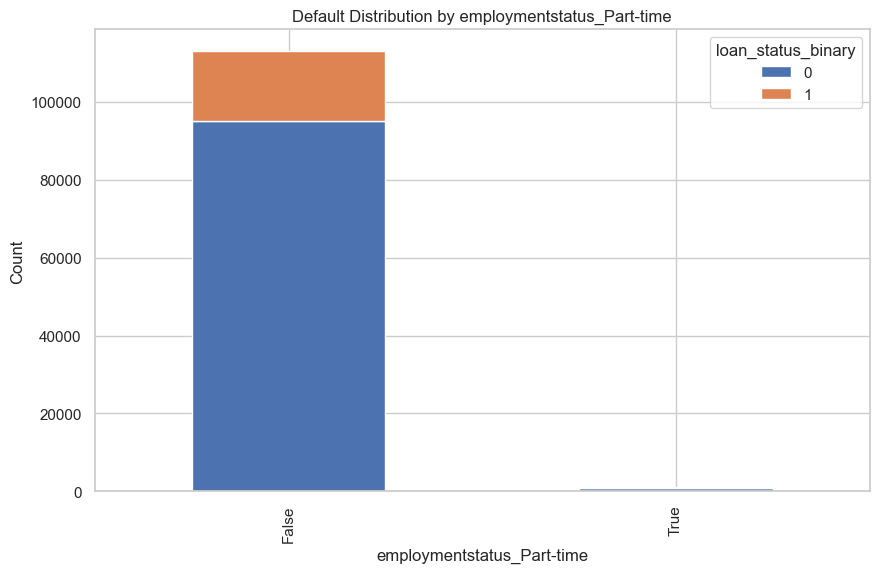

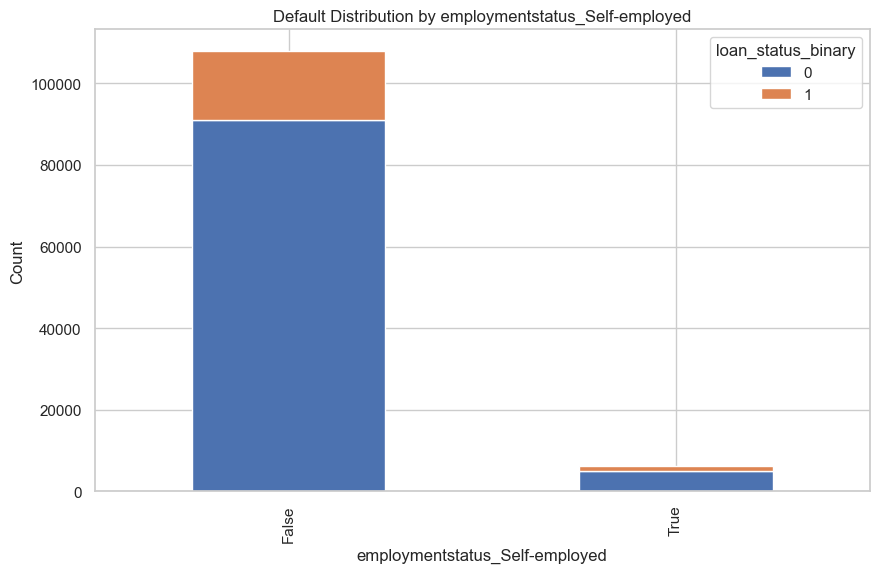

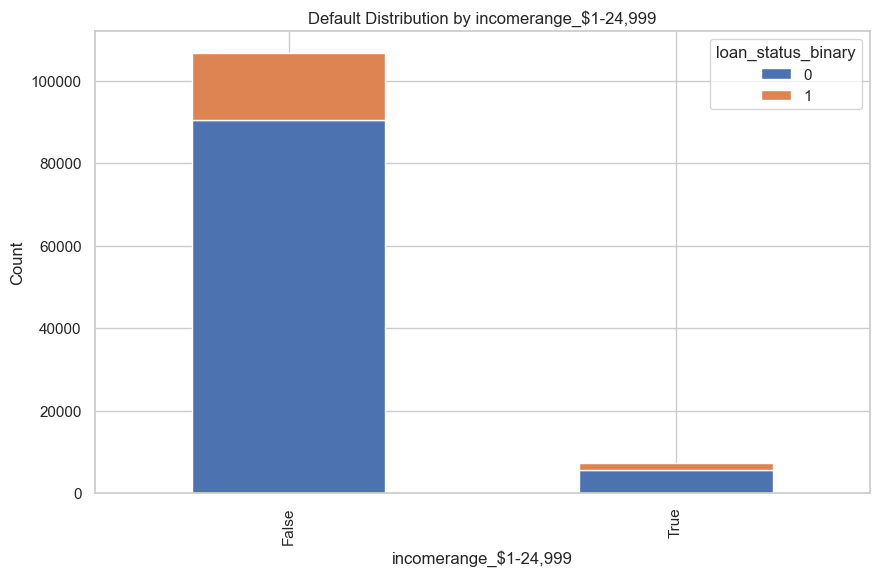

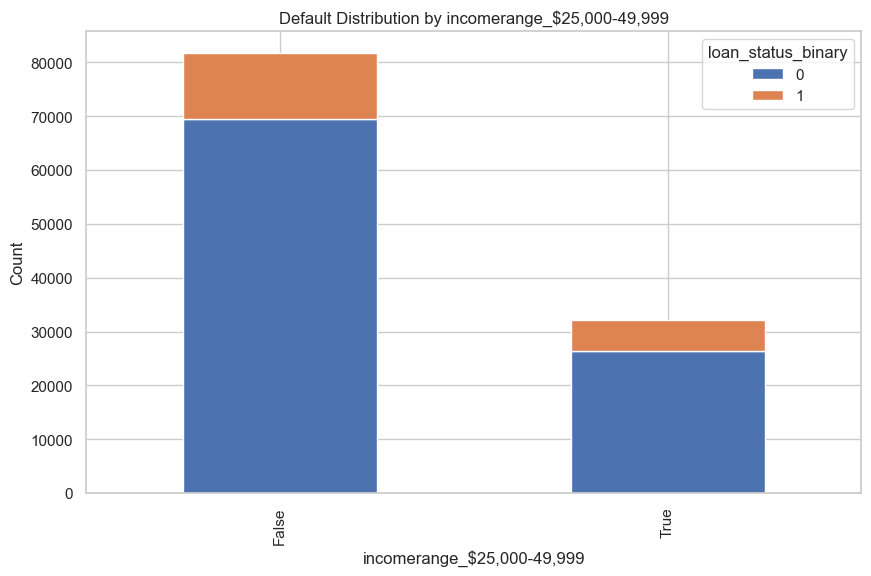

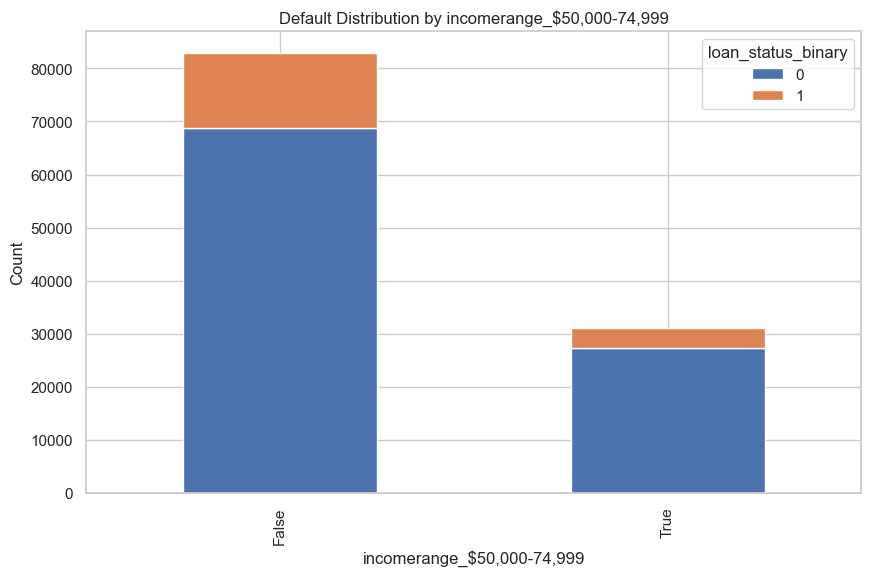

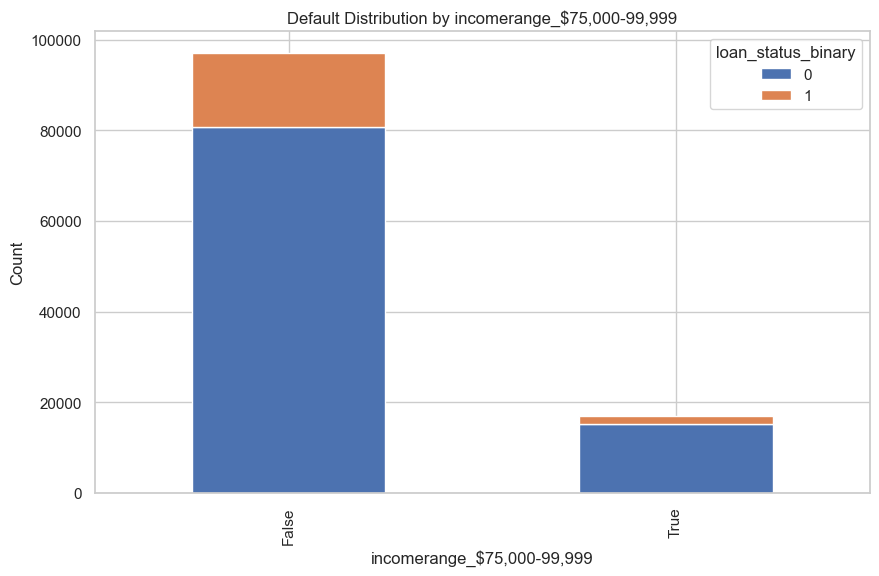

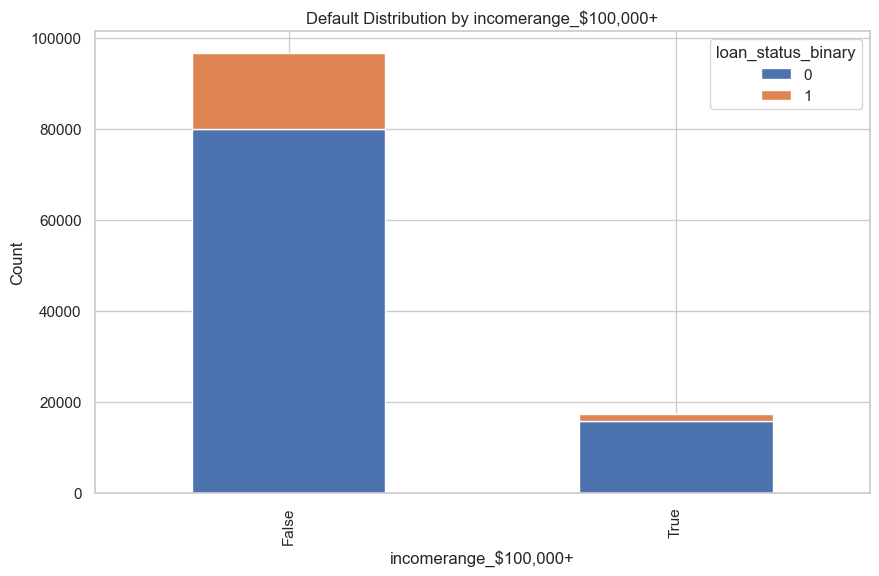

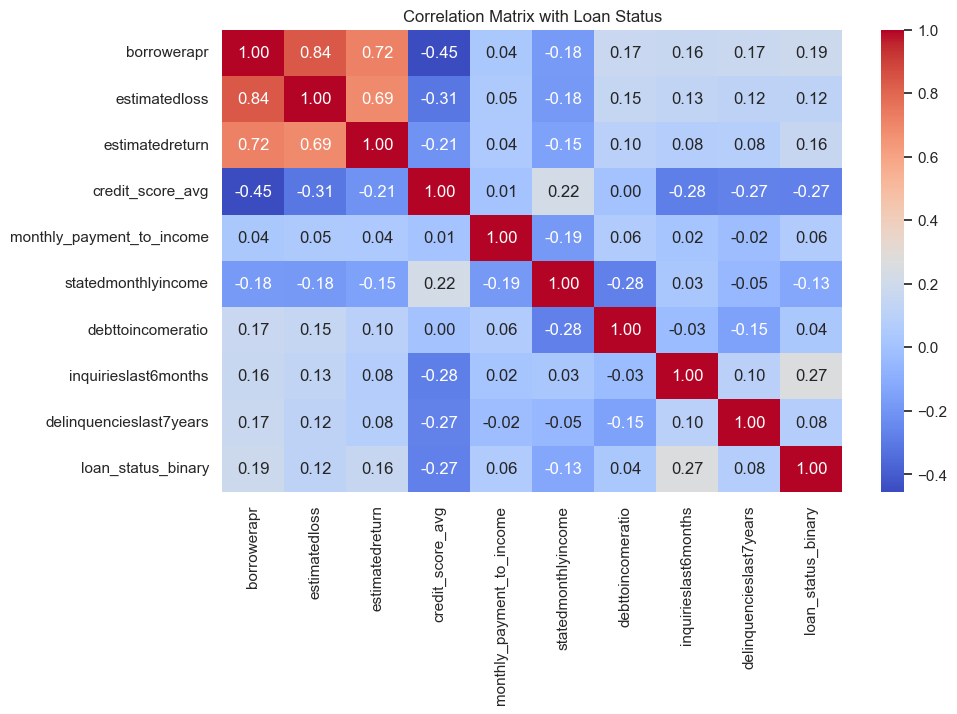

In [10]:
#Bivariate analysis
# Boxplots of risk features by target
for feature in risk_features:
    sns.boxplot(x=target, y=feature, data=df, palette='Set2')
    plt.title(f"{feature} vs {target}")
    plt.show()

# Count plots for categorical features
categorical_features = [
    'employmentstatus_Full-time', 'employmentstatus_Part-time',
    'employmentstatus_Self-employed', 'incomerange_$1-24,999',
    'incomerange_$25,000-49,999', 'incomerange_$50,000-74,999',
    'incomerange_$75,000-99,999', 'incomerange_$100,000+'
]

for col in categorical_features:
    pd.crosstab(df[col], df[target]).plot(kind='bar', stacked=True)
    plt.title(f"Default Distribution by {col}")
    plt.ylabel("Count")
    plt.show()

# Correlation heatmap
corr = df[risk_features + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix with Loan Status")
plt.show()

In [ ]:
'''
a. Boxplots:
Defaulters (loan_status_binary = 1) tend to have:
Higher borrowerapr, estimatedloss, monthly_payment_to_income
Lower estimatedreturn, credit_score_avg

Insights:
These variables are strong indicators of default risk.
Clear distributional differences between default vs non-default groups.

b. Countplots (Categorical One-Hot Features):
Categories like Low Income ($1–24k, $25–49k) and Part-Time / Self-Employed show higher default counts.
High-income and full-time groups have a relatively lower share of defaulters.

Insights:
Income level and employment status are highly informative.
These can be important features for credit scoring.

c. Correlation Heatmap:
estimatedloss and borrowerapr are positively correlated with default.
estimatedreturn and credit_score_avg are negatively correlated with default.

Insights:
Feature correlation aligns well with expected business logic.
Good input for feature selection or multicollinearity checks.

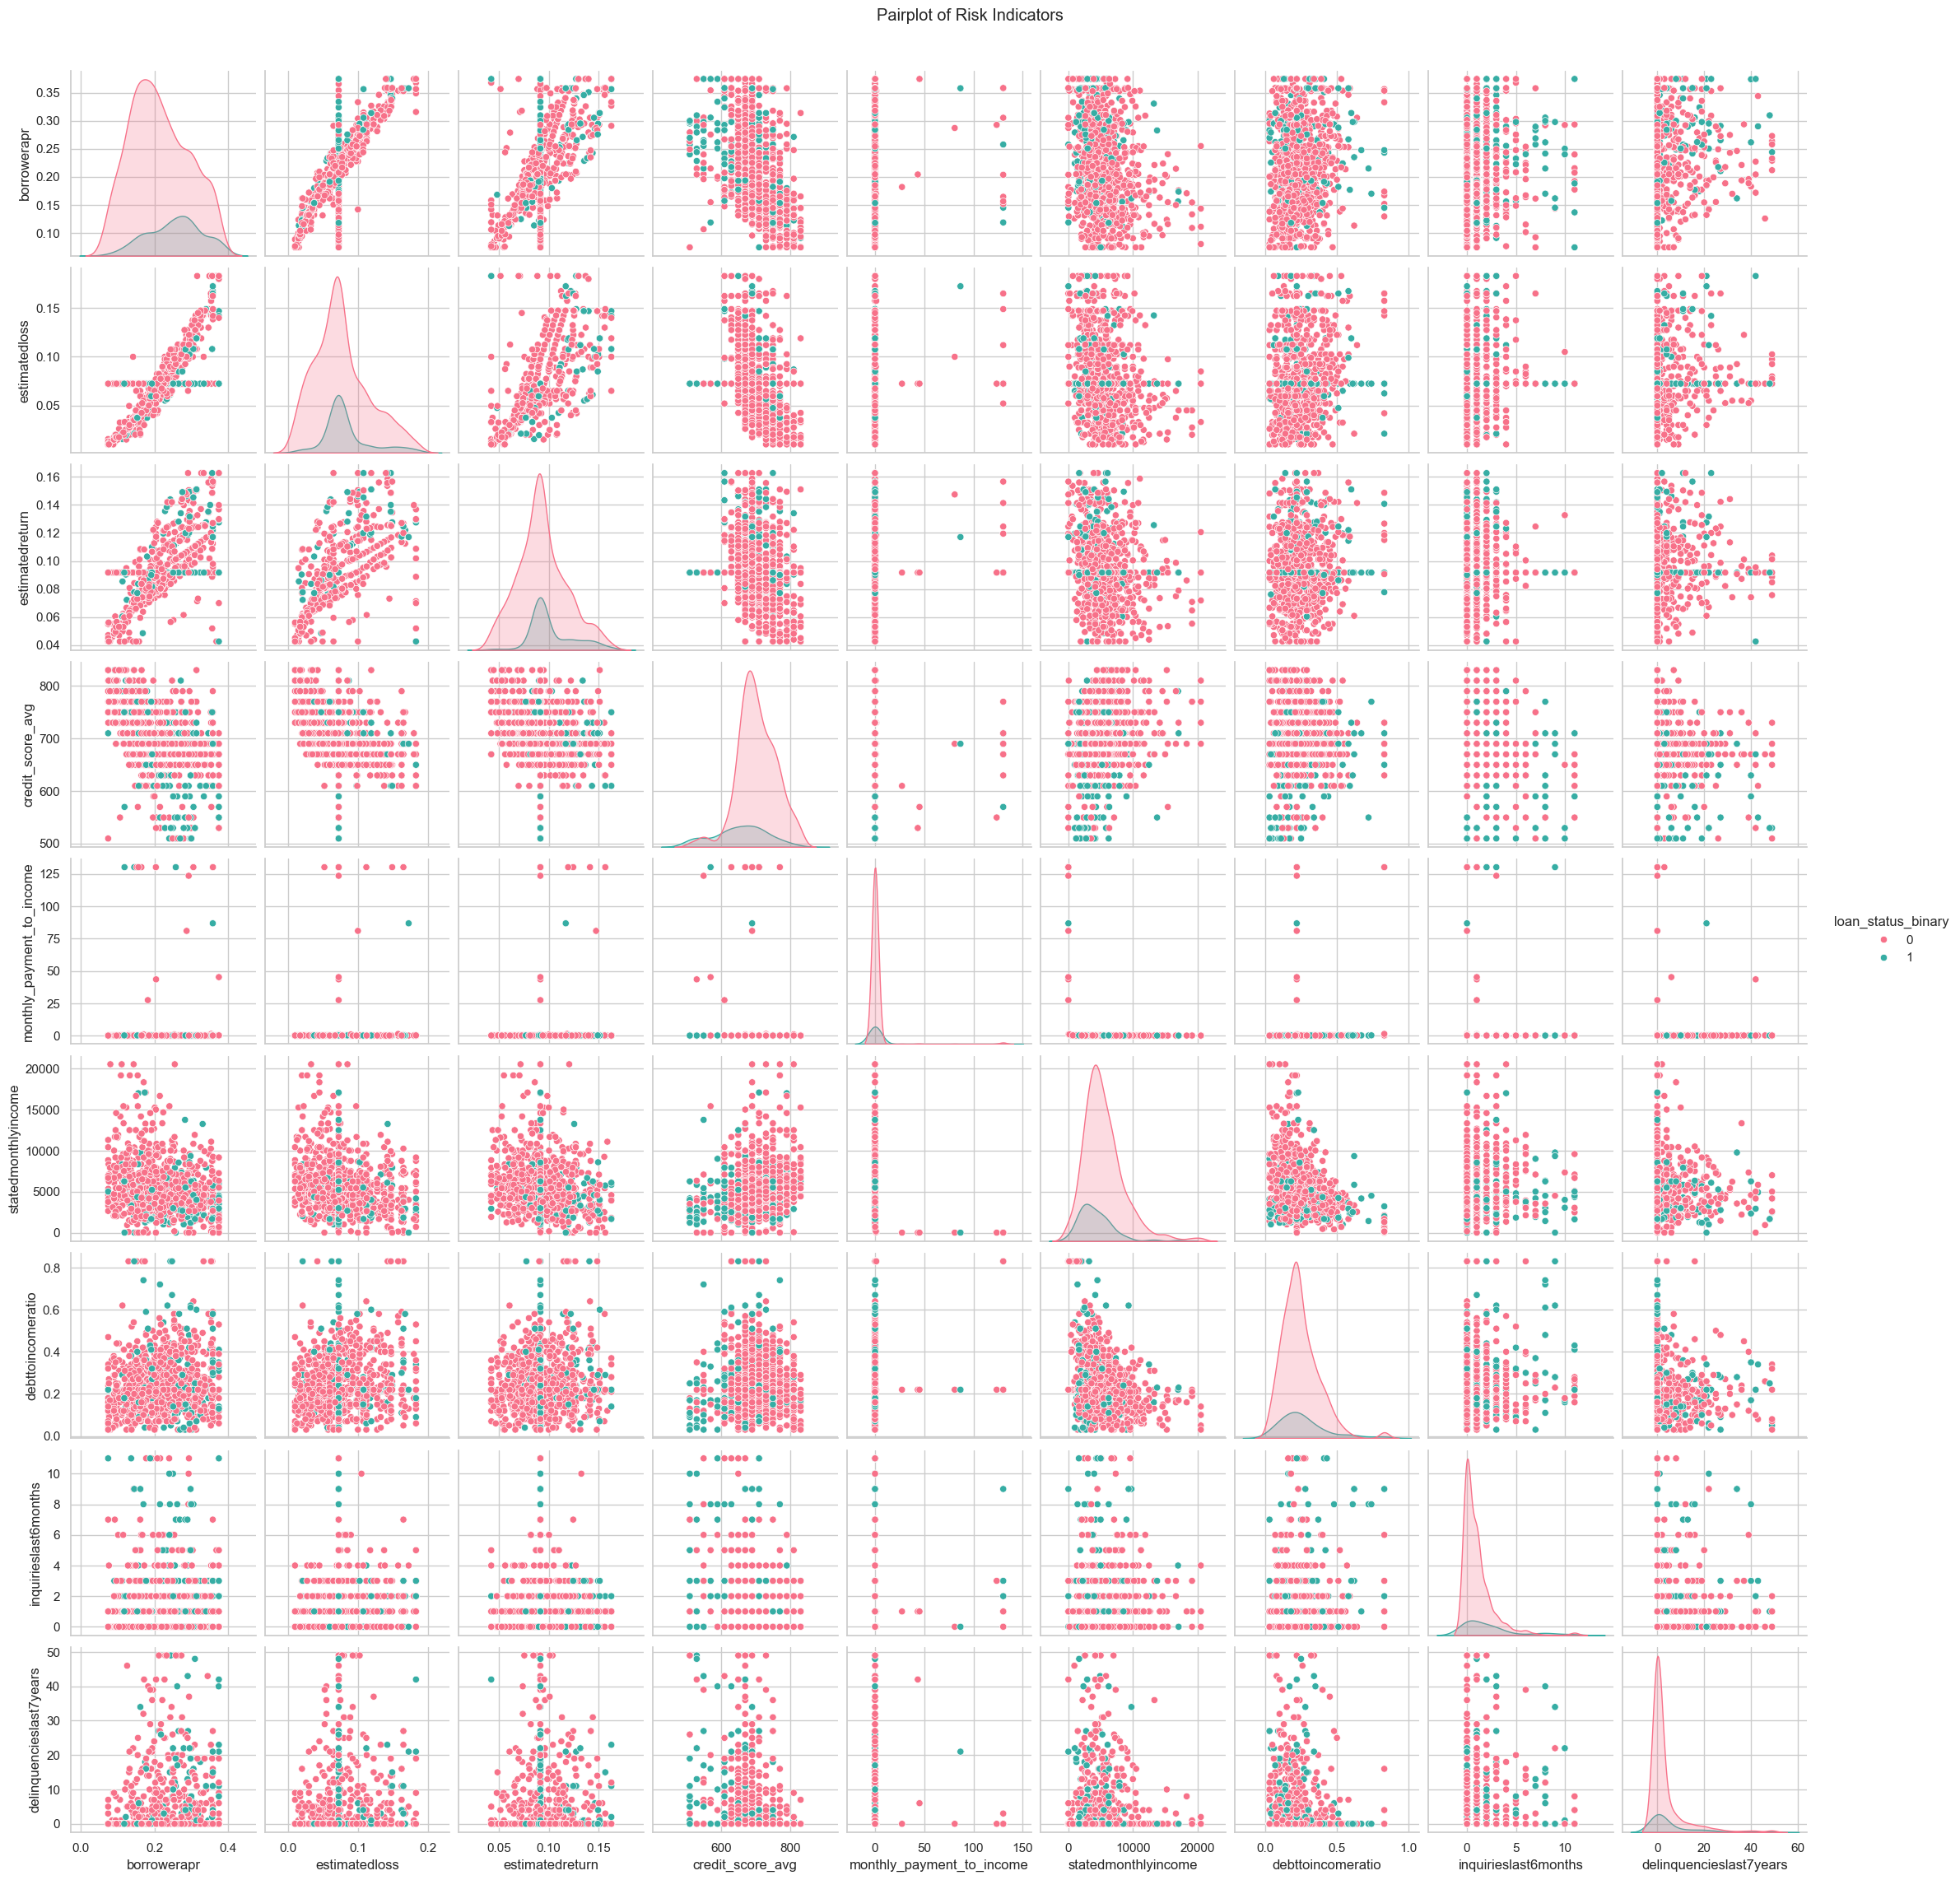

In [11]:
#Multivariate analysis
# Sampled pairplot for performance
sns.pairplot(df[[*risk_features, target]].sample(1000), hue=target, palette='husl')
plt.suptitle("Pairplot of Risk Indicators", y=1.02)
plt.show()


In [ ]:
'''
Clear clusters where high APR + high loss + low credit score → high default zone.
Insights:
Helpful for identifying overlapping borrower profiles.
Consider applying PCA or clustering if needed later.
'''

In [27]:
#Statistical tests
# T-Test (numerical features)
print("📊 T-Test Results:")
for feature in risk_features:
    g0 = df[df[target] == 0][feature]
    g1 = df[df[target] == 1][feature]
    stat, p = ttest_ind(g0, g1, equal_var=False)
    print(f"{feature}: p-value = {p:.4e} → {'Significant' if p < 0.05 else 'Not significant'}")

# Chi-Square Test (categorical one-hot encoded)
print("\n📊 Chi-Square Test Results:")
for col in categorical_features:
    table = pd.crosstab(df[col], df[target])
    _, p, _, _ = chi2_contingency(table)
    print(f"{col}: p-value = {p:.4e} → {'Significant' if p < 0.05 else 'Not significant'}")

📊 T-Test Results:
borrowerapr: p-value = 0.0000e+00 → Significant
estimatedloss: p-value = 0.0000e+00 → Significant
estimatedreturn: p-value = 0.0000e+00 → Significant
credit_score_avg: p-value = 0.0000e+00 → Significant
monthly_payment_to_income: p-value = 1.4602e-48 → Significant
statedmonthlyincome: p-value = 0.0000e+00 → Significant
debttoincomeratio: p-value = 3.1437e-25 → Significant
inquirieslast6months: p-value = 0.0000e+00 → Significant
delinquencieslast7years: p-value = 1.3567e-112 → Significant

📊 Chi-Square Test Results:
employmentstatus_Full-time: p-value = 0.0000e+00 → Significant
employmentstatus_Part-time: p-value = 2.8818e-15 → Significant
employmentstatus_Self-employed: p-value = 1.6788e-16 → Significant
incomerange_$1-24,999: p-value = 1.1934e-86 → Significant
incomerange_$25,000-49,999: p-value = 3.7799e-37 → Significant
incomerange_$50,000-74,999: p-value = 1.4005e-91 → Significant
incomerange_$75,000-99,999: p-value = 2.2728e-116 → Significant
incomerange_$100,000

In [ ]:
'''
📌 T-Tests (Numerical Features vs Default)
For each risk feature, the test checks whether the mean value is significantly different between defaulters (loan_status_binary = 1) and non-defaulters (= 0).

💡 Insights:
Most financial features are statistically significant → their values differ between defaulting and non-defaulting groups.
These features are excellent candidates for model input.

📌 Chi-Square Tests (Categorical One-Hot Features vs Default)
Checks if default frequency differs significantly across categories (e.g., full-time vs part-time).

Insights:
Default risk varies significantly by employment and income group.
Confirms visual results from countplots with quantitative backing.
Chi-Square significance supports including these features.

C:\Users\karis\AppData\Local\Temp\ipykernel_5332\583720997.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[risk_features] = scaler.fit_transform(X[risk_features])
C:\Users\karis\AppData\Local\Temp\ipykernel_5332\583720997.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[:15], y=importances.index[:15], palette='viridis')


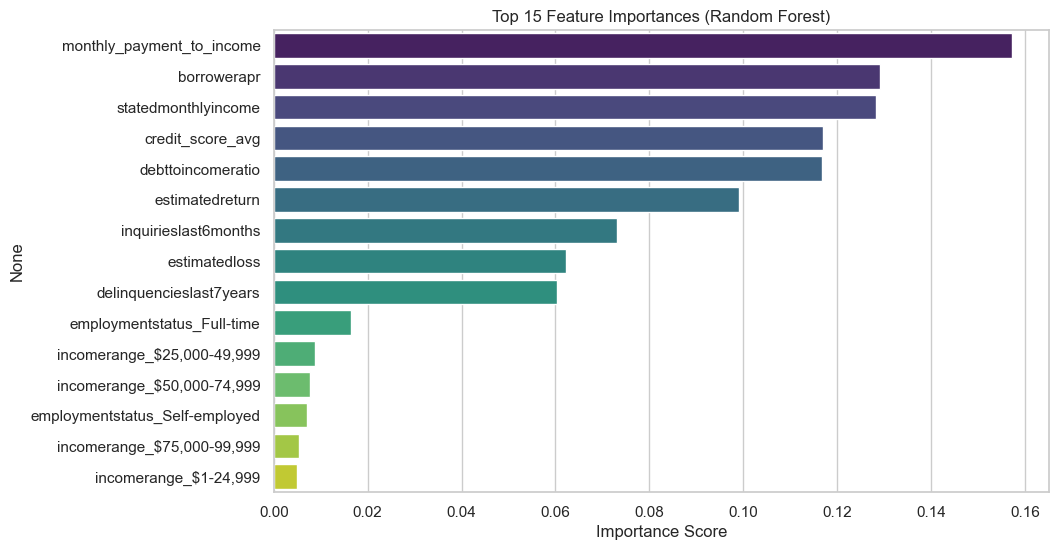

In [28]:
#feature importance (using Random Forrest)
# Prepare data
X = df[risk_features + categorical_features]
y = df[target]

# Scale numeric features
scaler = StandardScaler()
X[risk_features] = scaler.fit_transform(X[risk_features])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plot importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances[:15], y=importances.index[:15], palette='viridis')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()


In [ ]:
'''
💡 Insights:

Confirms that APR, loss, and credit score are top predictors of default.
Employment and income groups contribute but are less dominant than numeric risk scores.
Great validation of earlier visual and statistical analysis.
'''